# Capstone Webscrapping using BeautifulSoup
by Irma Savitri Widiasri

The task is to fulfill the final project of Algoritma-Data Analytic Course. 

The objective of the project is to perform webscrapping to get historical exchange rate between the Indonesian Rupiah (IDR) and US Dollar (USD). After getting the information from the web, we perform data wrangling and develop a plot to identify visually the trend and pattern of the exchange rate over time.

This notebook contains guidances & tasks on the data processing for the application.



## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="A" />\n<base href="https://www.exchange-rates.org/" />\n'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('table',attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    11/27/2020
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/11-27-2020">
     14,078.12448
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/11-27-2020">
     USD IDR rate for 11/27/2020
    </a>
   </td>
  </tr>
  <tr>
   <td>
    11/26/2020
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate


In [5]:
tr = table.find_all('tr')
tr[:2] # just call 2 founded tr
len(tr)

147

Do the scrapping process here (please change this markdown with your explanation)

In [6]:
temp = [] #initiating a tuple


for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get date
    date = row.find_all('td')[0].text
    date = date.strip() #for removing the excess whitespace
    
    #get weekday
    weekday = row.find_all('td')[1].text
    weekday = weekday.strip() #for removing the excess whitespace

    #get exchange rate
    rate = row.find_all('td')[2].text
    rate = rate.strip() #for removing the excess whitespace

    temp.append((date,weekday,rate)) 
    
temp

[('11/26/2020', 'Thursday', '14,090.70769 IDR'),
 ('11/25/2020', 'Wednesday', '14,136.09929 IDR'),
 ('11/24/2020', 'Tuesday', '14,137.48161 IDR'),
 ('11/23/2020', 'Monday', '14,185.57119 IDR'),
 ('11/20/2020', 'Friday', '14,162.60519 IDR'),
 ('11/19/2020', 'Thursday', '14,165.50144 IDR'),
 ('11/18/2020', 'Wednesday', '14,051.29503 IDR'),
 ('11/17/2020', 'Tuesday', '14,040.16051 IDR'),
 ('11/16/2020', 'Monday', '14,085.69501 IDR'),
 ('11/13/2020', 'Friday', '14,142.77143 IDR'),
 ('11/12/2020', 'Thursday', '14,141.24303 IDR'),
 ('11/11/2020', 'Wednesday', '14,073.46024 IDR'),
 ('11/10/2020', 'Tuesday', '14,053.76135 IDR'),
 ('11/9/2020', 'Monday', '14,283.29667 IDR'),
 ('11/6/2020', 'Friday', '14,214.49744 IDR'),
 ('11/5/2020', 'Thursday', '14,389.14027 IDR'),
 ('11/4/2020', 'Wednesday', '14,544.44634 IDR'),
 ('11/3/2020', 'Tuesday', '14,589.01774 IDR'),
 ('11/2/2020', 'Monday', '14,612.89990 IDR'),
 ('10/30/2020', 'Friday', '14,629.16216 IDR'),
 ('10/29/2020', 'Thursday', '14,701.62361 

In [7]:
#reverse tuple to reverse the information
temp = temp[::-1]
temp

[('5/31/2020', 'Sunday', '14,664.14584 IDR'),
 ('6/1/2020', 'Monday', '14,586.73900 IDR'),
 ('6/2/2020', 'Tuesday', '14,382.27395 IDR'),
 ('6/3/2020', 'Wednesday', '14,060.78946 IDR'),
 ('6/4/2020', 'Thursday', '14,113.82802 IDR'),
 ('6/5/2020', 'Friday', '14,305.96407 IDR'),
 ('6/7/2020', 'Sunday', '13,989.39489 IDR'),
 ('6/8/2020', 'Monday', '13,867.95377 IDR'),
 ('6/9/2020', 'Tuesday', '13,870.75718 IDR'),
 ('6/10/2020', 'Wednesday', '13,976.91611 IDR'),
 ('6/11/2020', 'Thursday', '13,966.85142 IDR'),
 ('6/12/2020', 'Friday', '14,121.55442 IDR'),
 ('6/14/2020', 'Sunday', '14,145.23543 IDR'),
 ('6/15/2020', 'Monday', '14,021.62200 IDR'),
 ('6/16/2020', 'Tuesday', '14,046.73959 IDR'),
 ('6/17/2020', 'Wednesday', '14,120.02241 IDR'),
 ('6/18/2020', 'Thursday', '14,095.36729 IDR'),
 ('6/19/2020', 'Friday', '14,077.63950 IDR'),
 ('6/21/2020', 'Sunday', '14,068.55627 IDR'),
 ('6/22/2020', 'Monday', '14,136.05128 IDR'),
 ('6/23/2020', 'Tuesday', '14,148.27391 IDR'),
 ('6/24/2020', 'Wednesd

## Creating data frame & Data wrangling

Put the array into dataframe

In [12]:
import pandas as pd

data = pd.DataFrame(temp, columns = ('Date','Weekday','Rate_IDR'))
data.head()

,Date,Weekday,Rate_IDR
0,5/31/2020,Sunday,"14,664.14584 IDR"
1,6/1/2020,Monday,"14,586.73900 IDR"
2,6/2/2020,Tuesday,"14,382.27395 IDR"
3,6/3/2020,Wednesday,"14,060.78946 IDR"
4,6/4/2020,Thursday,"14,113.82802 IDR"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [13]:
#Remove string 'IDR' from column 'Rate_IDR'
data['Rate_IDR'] = data['Rate_IDR'].str.replace(" IDR","")

#Remove string ',' from column 'Rate_IDR'
data['Rate_IDR'] = data['Rate_IDR'].str.replace(",","")

#Change the type of 'Rate_IDR' into float
data['Rate_IDR'] = data['Rate_IDR'].astype('float64')

#Change the type of 'Date' into float
data['Date'] = data['Date'].astype('Datetime64')

#Change the type of 'Date' into category
data['Weekday'] = data['Weekday'].astype('category')

data

,Date,Weekday,Rate_IDR
0,2020-05-31,Sunday,14664.14584
1,2020-06-01,Monday,14586.73900
2,2020-06-02,Tuesday,14382.27395
3,2020-06-03,Wednesday,14060.78946
4,2020-06-04,Thursday,14113.82802
...,...,...,...
141,2020-11-20,Friday,14162.60519
142,2020-11-23,Monday,14185.57119
143,2020-11-24,Tuesday,14137.48161
144,2020-11-25,Wednesday,14136.09929


In [14]:
#Set the index into Date
data = data.set_index('Date')
data

,Weekday,Rate_IDR
Date,,
2020-05-31,Sunday,14664.14584
2020-06-01,Monday,14586.73900
2020-06-02,Tuesday,14382.27395
2020-06-03,Wednesday,14060.78946
2020-06-04,Thursday,14113.82802
...,...,...
2020-11-20,Friday,14162.60519
2020-11-23,Monday,14185.57119
2020-11-24,Tuesday,14137.48161


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='Date'>

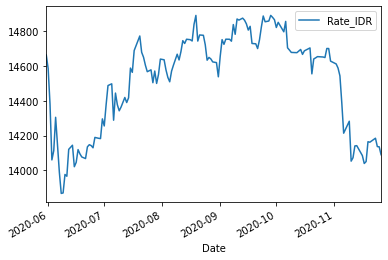

In [15]:
data.plot()

From the plot, we notice that the exchange rate drop in June 2020, which means the strongest IDR rate. Then the exchange rate is increase until October 2020 but afterward decrease again up to November 2020. 


### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

In [16]:
#Create a copy of data frame data
data2 = data.copy()
data2.head()

,Weekday,Rate_IDR
Date,,
2020-05-31,Sunday,14664.14584
2020-06-01,Monday,14586.73900
2020-06-02,Tuesday,14382.27395
2020-06-03,Wednesday,14060.78946
2020-06-04,Thursday,14113.82802


In [17]:
#Calculate the exchange rate difference from the day before
data2['Rate_Diff'] = data2['Rate_IDR'].diff()
data2


,Weekday,Rate_IDR,Rate_Diff
Date,,,
2020-05-31,Sunday,14664.14584,NaN
2020-06-01,Monday,14586.73900,-77.40684
2020-06-02,Tuesday,14382.27395,-204.46505
2020-06-03,Wednesday,14060.78946,-321.48449
2020-06-04,Thursday,14113.82802,53.03856
...,...,...,...
2020-11-20,Friday,14162.60519,-2.89625
2020-11-23,Monday,14185.57119,22.96600
2020-11-24,Tuesday,14137.48161,-48.08958


In [18]:
#groupby data2 into weekday and calculate the 'rate_diff' mean by weekday
data_wday = data2.groupby('Weekday').mean()['Rate_Diff'].sort_values(ascending=False)
data_wday


Weekday
Friday       18.430531
Thursday      0.392414
Wednesday    -1.332916
Tuesday      -3.115541
Sunday      -10.498230
Monday      -29.260486
Name: Rate_Diff, dtype: float64

<AxesSubplot:xlabel='Weekday'>

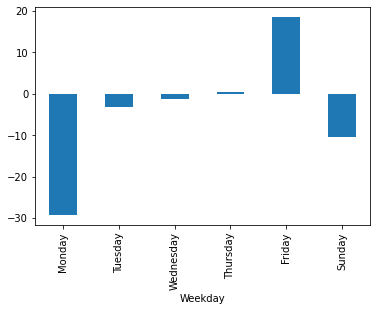

In [19]:
#Define categorical order
wday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

#Sorting by order of weekday
data_wday.index = pd.CategoricalIndex(data_wday.index, categories=wday, ordered=True)
data_wday = data_wday.sort_index()

#Create the plot
data_wday.plot.bar()


From the plot above, we notice that exchange rate on Monday tend to be lower than the day before. Moreover, the exchange rate on Friday tends to be higher than the day before.